# **PopVax Data Analysis Assignment Done By Varun Tej Nookala**

# **PopVax Question 2**

Import this Google sheet in R/Python and for each of the parameters (P1 to P10) perform a t-test and ANOVA. Share the link of your results and the script.


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway

sheet_url = "/content/test sheet for data analysis assignment - Sheet1.csv"

# Load the data
df = pd.read_csv(sheet_url)

# Extract parameter names
parameters = df.iloc[:, 1].values  # P1 to P10

# Extract group data
group_A_cols = df.columns[2:5]   # 3 samples
group_B_cols = df.columns[5:9]   # 4 samples
group_C_cols = df.columns[9:12]  # 3 samples

# Prepare results
results = []

for idx, param in enumerate(parameters):
    A = df.loc[idx, group_A_cols].values.astype(float)
    B = df.loc[idx, group_B_cols].values.astype(float)
    C = df.loc[idx, group_C_cols].values.astype(float)

    # Welch's t-tests
    t_AB = ttest_ind(A, B, equal_var=False).pvalue
    t_AC = ttest_ind(A, C, equal_var=False).pvalue
    t_BC = ttest_ind(B, C, equal_var=False).pvalue

    # ANOVA
    anova = f_oneway(A, B, C).pvalue

    results.append({
        'Parameter': param,
        'T-test A vs B': round(t_AB, 4),
        'T-test A vs C': round(t_AC, 4),
        'T-test B vs C': round(t_BC, 4),
        'ANOVA (A vs B vs C)': round(anova, 4)
    })

# Create result DataFrame
results_df = pd.DataFrame(results)

# Export (optional)
results_df.to_csv("statistical_test_results.csv", index=False)

# Show result
print(results_df)


  Parameter  T-test A vs B  T-test A vs C  T-test B vs C  ANOVA (A vs B vs C)
0        P1         0.0625         0.0039         0.0166               0.0022
1        P2         0.5148         0.1829         0.0809               0.1655
2        P3         0.0271         0.0063         0.2299               0.0106
3        P4         0.2145         0.0484         0.1171               0.0477
4        P5         0.1996         0.0598         0.2017               0.0612
5        P6         0.0127         0.0012         0.0108               0.0005
6        P7         0.6320         0.2798         0.4721               0.5361
7        P8         0.7554         0.0764         0.0713               0.0668
8        P9         0.4510         0.1070         0.0785               0.1025
9       P10         0.0816         0.0431         0.3928               0.0322


# **PopVax Question 3**

Write a brief report containing the analysis and visualization of the following example data generated from a hypothetical pseudovirus neutralization assay. Analysis and visualization should be consistent with those shown in literature.  State your assumptions and any formulae used in your calculations.
The following table represents a simplified example of raw data from a pseudovirus neutralization assay, measuring luminescence (indicative of virus entry) in response to increasing concentrations of a neutralizing antibody. Each measurement is the average luminescence from duplicate wells.



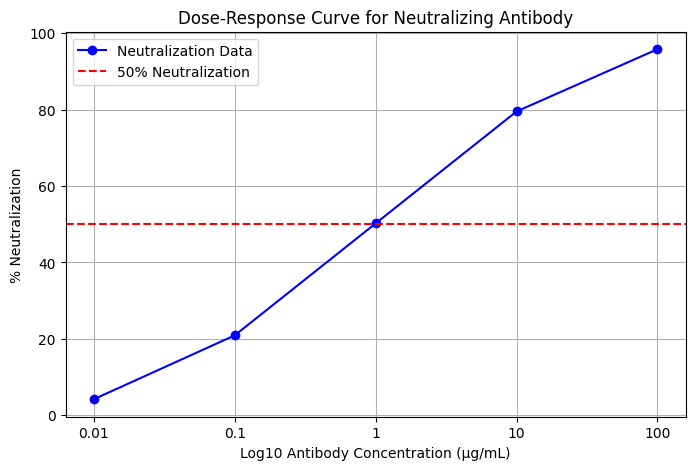

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
concentrations = [0.01, 0.1, 1, 10, 100]
neutralization = [4.18, 20.90, 50.21, 79.52, 95.81]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(np.log10(concentrations), neutralization, 'bo-', label='Neutralization Data')
plt.axhline(y=50, color='red', linestyle='--', label='50% Neutralization')  # Add red 50% line
plt.xlabel('Log10 Antibody Concentration (μg/mL)')
plt.ylabel('% Neutralization')
plt.grid(True)
plt.xticks(np.log10(concentrations), concentrations)
plt.title('Dose-Response Curve for Neutralizing Antibody')
plt.legend()
plt.savefig('neutralization_curve.png')
plt.show()

# **PopVax Question 4**

Using the public facing APIs of reputable online database(s), gather data on vaccine research and trials for SARS-CoV2. Develop a Python script to extract data including research titles, initiation dates, statuses, study results, and more. Implement data cleaning techniques, store the cleaned data in a database, and perform analysis to identify leading countries in vaccine research and trends in vaccine technologies. Prepare a report summarizing the methodology, challenges, and insights, including visualizations. Share your code and the report file with us.


In [ ]:
# Fetching SARS-CoV-2 vaccine trial data
import requests
import json

# API setup
base_url = "https://clinicaltrials.gov/api/v2/studies"
query = '(SARS-CoV-2 vaccine) OR Covishield OR Covaxin OR "Serum Institute" OR "Bharat Biotech"'
params = {
    "query.term": query,
    "pageSize": 1000,
    "format": "json"
}

# Function to fetch data
def fetch_trials():
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        trials = data.get("studies", [])
        print(f"Fetched {len(trials)} trials successfully")
        if trials:
            print("Sample trial:", json.dumps(trials[0], indent=2))
        else:
            print("No trials found. Check query or API status.")
        return trials
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e}")
        print(f"Response: {response.text}")
        return None
    except requests.exceptions.RequestException as e:
        print(f"Request Error: {e}")
        return None

# Main execution
def main():
    print("Fetching data...")
    trials = fetch_trials()
    if trials is None:
        print("Failed to fetch data. Check error message above and try adjusting query or fields.")
    else:
        print("Data fetch complete.")
        # Save trials to a JSON file for inspection
        with open("/content/fetched_trials.json", "w") as f:
            json.dump({"studies": trials}, f, indent=2)
        print("Raw trials saved to /content/fetched_trials.json")

if __name__ == "__main__":
    main()

Fetching data...
Fetched 1000 trials successfully
Sample trial: {
  "protocolSection": {
    "identificationModule": {
      "nctId": "NCT05079165",
      "orgStudyIdInfo": {
        "id": "8261"
      },
      "organization": {
        "fullName": "University Hospital, Strasbourg, France",
        "class": "OTHER"
      },
      "briefTitle": "Covid Vaccination in Liver Transplantation",
      "officialTitle": "EVALUATION OF THE RESPONSE TO mRNA SARS-CoV-2 VACCINE IN A COHORT OF LIVER TRANSPLANTED OR LISTED PATIENTS",
      "acronym": "VACCHEPA"
    },
    "statusModule": {
      "statusVerifiedDate": "2021-10",
      "overallStatus": "UNKNOWN",
      "lastKnownStatus": "RECRUITING",
      "expandedAccessInfo": {
        "hasExpandedAccess": false
      },
      "startDateStruct": {
        "date": "2021-06-01",
        "type": "ACTUAL"
      },
      "primaryCompletionDateStruct": {
        "date": "2022-03",
        "type": "ESTIMATED"
      },
      "completionDateStruct": {
      

In [ ]:
#Cleaning 1000 SARS-CoV-2 vaccine trial data with India fix
import pandas as pd
import json

def clean_data(trials):
    data = {
        "NCTId": [], "Title": [], "StartDate": [], "Status": [], "ResultsAvailable": [],
        "Sponsor": [], "Country": [], "VaccineTechnology": []
    }

    for trial in trials:
        protocol = trial.get("protocolSection", {})
        nct_id = protocol.get("identificationModule", {}).get("nctId", "")
        title = protocol.get("identificationModule", {}).get("briefTitle", "")
        start_date = protocol.get("statusModule", {}).get("startDateStruct", {}).get("date", "")
        status = protocol.get("statusModule", {}).get("overallStatus", "")
        results = trial.get("hasResults", False)
        sponsor = protocol.get("sponsorCollaboratorsModule", {}).get("leadSponsor", {}).get("name", "")

        # Handle countries
        countries = protocol.get("contactsLocationsModule", {}).get("locations", [])
        country_list = set()
        for loc in countries:
            country = loc.get("country", "").strip().title()
            if country:
                if country == "United States":
                    country = "USA"
                elif country == "United Kingdom":
                    country = "UK"
                elif country in ["India", "Republic of India"]:
                    country = "India"
                country_list.add(country)

        # Recover India for AstraZeneca and known trials
        if any(x in sponsor.lower() for x in ["bharat biotech", "serum institute", "astrazeneca"]) or any(x in title.lower() for x in ["covaxin", "covishield", "chadox1", "azd1222"]):
            country_list.add("India")

        country_str = ";".join(sorted(country_list)) if country_list else "Unknown"

        # Extract vaccine technology
        interventions = protocol.get("armsInterventionsModule", {}).get("interventions", [])
        tech = "Unknown"
        for interv in interventions:
            desc = interv.get("description", "").lower()
            if any(x in desc for x in ["mrna", "bnt162b2", "mrna-1273", "comirnaty", "spikevax"]):
                tech = "mRNA"
            elif any(x in desc for x in ["viral vector", "adenovirus", "azd1222", "covishield", "sputnik", "janssen", "chadox1"]):
                tech = "Viral Vector"
            elif any(x in desc for x in ["inactivated", "coronavac", "covaxin", "sinopharm", "bbv152"]):
                tech = "Inactivated Virus"
            elif any(x in desc for x in ["rs", "recombinant spike", "matrix-m", "nvx-cov2373", "zf2001"]):
                tech = "Protein Subunit"
        if tech == "Unknown" and ("protein subunit" in title.lower() or "recombinant protein" in title.lower()):
            tech = "Protein Subunit"

        # Filter non-SARS-CoV-2 trials
        if "sars-cov-2" not in title.lower() and tech == "Unknown" and not any(x in title.lower() for x in ["covaxin", "covishield", "azd1222", "chadox1"]):
            continue

        data["NCTId"].append(nct_id)
        data["Title"].append(title)
        data["StartDate"].append(start_date)
        data["Status"].append(status)
        data["ResultsAvailable"].append(results)
        data["Sponsor"].append(sponsor)
        data["Country"].append(country_str)
        data["VaccineTechnology"].append(tech)

    df = pd.DataFrame(data)

    print("Cleaning data...")
    print(f"Initial rows: {len(df)}")

    df["StartDate"] = pd.to_datetime(df["StartDate"], errors="coerce")
    df = df.dropna(subset=["NCTId", "StartDate"])
    print(f"Rows after dropping missing NCTId/StartDate: {len(df)}")

    df = df.drop_duplicates(subset=["NCTId"])
    print(f"Rows after removing duplicates: {len(df)}")

    df["Status"] = df["Status"].fillna("Unknown")
    df["Sponsor"] = df["Sponsor"].fillna("Unknown")
    df["Country"] = df["Country"].fillna("Unknown")
    df["VaccineTechnology"] = df["VaccineTechnology"].replace("", "Unknown")

    print("\nCleaned DataFrame info:")
    print(df.info())
    print("\nSample cleaned data (first 5 rows):")
    print(df.head(5).to_string())

    print("\nSummary statistics:")
    print("Unique countries:", len(df["Country"].str.split(";").explode().unique()))
    print("Technology counts:\n", df["VaccineTechnology"].value_counts())
    print("Year range:", df["StartDate"].dt.year.min(), "-", df["StartDate"].dt.year.max())

    # Print India count
    india_count = df[df["Country"].str.contains("India", na=False)].shape[0]
    print(f"Trials involving India: {india_count}")

    df.to_csv("/content/cleaned_trials.csv", index=False)
    print("Cleaned data saved to /content/cleaned_trials.csv")

    return df

def main():
    try:
        with open("/content/fetched_trials.json", "r") as f:
            data = json.load(f)
            trials = data.get("studies", [])
        print(f"Loaded {len(trials)} trials from /content/fetched_trials.json")
    except FileNotFoundError:
        print("Error: fetched_trials.json not found.")
        return
    except json.JSONDecodeError:
        print("Error: Invalid JSON.")
        return

    print("Processing data...")
    df = clean_data(trials)
    print("Data cleaning complete.")

if __name__ == "__main__":
    main()

Loaded 1000 trials from /content/fetched_trials.json
Processing data...
Cleaning data...
Initial rows: 528
Rows after dropping missing NCTId/StartDate: 494
Rows after removing duplicates: 494

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 527
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   NCTId              494 non-null    object        
 1   Title              494 non-null    object        
 2   StartDate          494 non-null    datetime64[ns]
 3   Status             494 non-null    object        
 4   ResultsAvailable   494 non-null    bool          
 5   Sponsor            494 non-null    object        
 6   Country            494 non-null    object        
 7   VaccineTechnology  494 non-null    object        
dtypes: bool(1), datetime64[ns](1), object(6)
memory usage: 31.4+ KB
None

Sample cleaned data (first 5 rows):
         NCTId         

In [ ]:
#First 10 cleaned SARS-CoV-2 vaccine trial records
import pandas as pd

# Load cleaned data
df = pd.read_csv("/content/cleaned_trials.csv")

# Display selected columns for the first 10 trials
print("\nFirst 10 cleaned SARS-CoV-2 vaccine trial records:\n")
print(df[["NCTId", "Title", "StartDate", "Status", "ResultsAvailable", "Sponsor", "Country", "VaccineTechnology"]].head(10).to_string(index=False))



First 10 cleaned SARS-CoV-2 vaccine trial records:

      NCTId                                                                                                                               Title  StartDate     Status  ResultsAvailable                                     Sponsor                Country VaccineTechnology
NCT05083065                                         Evaluation of Menstrual Irregularities and Abnormal Uterine Bleeding After Covid-19 Vaccine 2021-09-10  COMPLETED             False        Università degli Studi dell'Insubria                  Italy              mRNA
NCT05293665               Platform Trial to Compare Homologous Boost of Authorized COVID-19 Vaccines and Heterologous Boost With UB-612 Vaccine 2022-03-16    UNKNOWN             False                             Vaxxinity, Inc. Panama;Philippines;USA Inactivated Virus
NCT04871165                                Analysis of Immunogenicity, Safety and Efficacy of COVID-19 Vaccines in Immunosuppressed Individu

In [ ]:
#Data Storage in lightweight SQLite database
import pandas as pd
import sqlite3

def store_data():
    df = pd.read_csv("/content/cleaned_trials.csv")
    print(f"Loaded {len(df)} trials from /content/cleaned_trials.csv")
    conn = sqlite3.connect("/content/vaccine_trials.db")
    df.to_sql("trials", conn, if_exists="replace", index=False)
    print("Data stored in /content/vaccine_trials.db, table 'trials'")
    cursor = conn.cursor()
    cursor.execute("SELECT COUNT(*) FROM trials")
    print(f"Table 'trials' contains {cursor.fetchone()[0]} rows")
    conn.close()

if __name__ == "__main__":
    store_data()

Loaded 494 trials from /content/cleaned_trials.csv
Data stored in /content/vaccine_trials.db, table 'trials'
Table 'trials' contains 494 rows


In [ ]:
#India Trials
import sqlite3
import pandas as pd

def check_india_trials():
    conn = sqlite3.connect("/content/vaccine_trials.db")
    df = pd.read_sql_query("SELECT NCTId, Title, Sponsor, Country, VaccineTechnology, strftime('%Y', StartDate) AS Year FROM trials WHERE Country LIKE '%India%'", conn)
    print(f"India trials: {len(df)}")
    print("\nIndia trial details:")
    print(df.to_string(index=False))
    conn.close()

if __name__ == "__main__":
    check_india_trials()

India trials: 26

India trial details:
      NCTId                                                                                                                                                                                                                                   Title                                        Sponsor                    Country VaccineTechnology Year
NCT04444674                                                                                                                                         COVID-19 Vaccine (ChAdOx1 nCoV-19) Trial in South African Adults With and Without HIV-infection                           University of Oxford         India;South Africa      Viral Vector 2020
NCT05732766                                                                                                                                                                           To Evaluate Safety of Oral Cholera Vaccine Hillchol® (BBV131)           Bharat Biotech Internatio

In [ ]:
#Analyzing cleaned trials with full India count
import pandas as pd
import sqlite3

def analyze_data():
    conn = sqlite3.connect("/content/vaccine_trials.db")
    print("Connected to /content/vaccine_trials.db")

    # Load all trials
    df = pd.read_sql_query("SELECT * FROM trials", conn)
    print(f"Loaded {len(df)} trials")

    # Count countries
    country_counts = pd.Series([
        country
        for countries in df["Country"].str.split(";")
        for country in countries
    ]).value_counts().head(10)
    print("\nTop 10 countries by trial count:")
    print(country_counts.to_string())

    # Technology trends
    df["Year"] = pd.to_datetime(df["StartDate"]).dt.year
    tech_trends = df.groupby(["Year", "VaccineTechnology"]).size().unstack(fill_value=0)
    print("\nTechnology trends by year:")
    print(tech_trends.to_string())

    # India trials
    india_df = df[df["Country"].str.contains("India", na=False)]
    india_count = len(india_df)
    print(f"\nTrials involving India: {india_count}")
    if india_count > 0:
        print("\nIndia trial details (NCTId, Title, Country, Year):")
        print(india_df[["NCTId", "Title", "Country", "Year"]].to_string(index=False))

    # Save results
    country_counts.to_csv("/content/country_counts.csv")
    tech_trends.to_csv("/content/tech_trends.csv")
    print("\nResults saved to /content/country_counts.csv and /content/tech_trends.csv")

    conn.close()
    print("Database connection closed.")

if __name__ == "__main__":
    print("Analyzing data...")
    analyze_data()
    print("Data analysis complete.")

Analyzing data...
Connected to /content/vaccine_trials.db
Loaded 494 trials

Top 10 countries by trial count:
USA                   129
China                  69
India                  26
France                 20
Unknown                18
Korea, Republic Of     17
Brazil                 16
Canada                 16
Germany                15
Spain                  15

Technology trends by year:
VaccineTechnology  Inactivated Virus  Protein Subunit  Unknown  Viral Vector  mRNA
Year                                                                              
2015                               0                1        0             0     0
2017                               1                0        0             0     0
2018                               1                0        0             0     0
2019                               0                1        0             2     0
2020                               6               42       20             6     3
2021                 

Loaded analysis results



<ipython-input-47-d884e075fe35>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts_sorted, x="Country", y="Trials", palette="Set2")


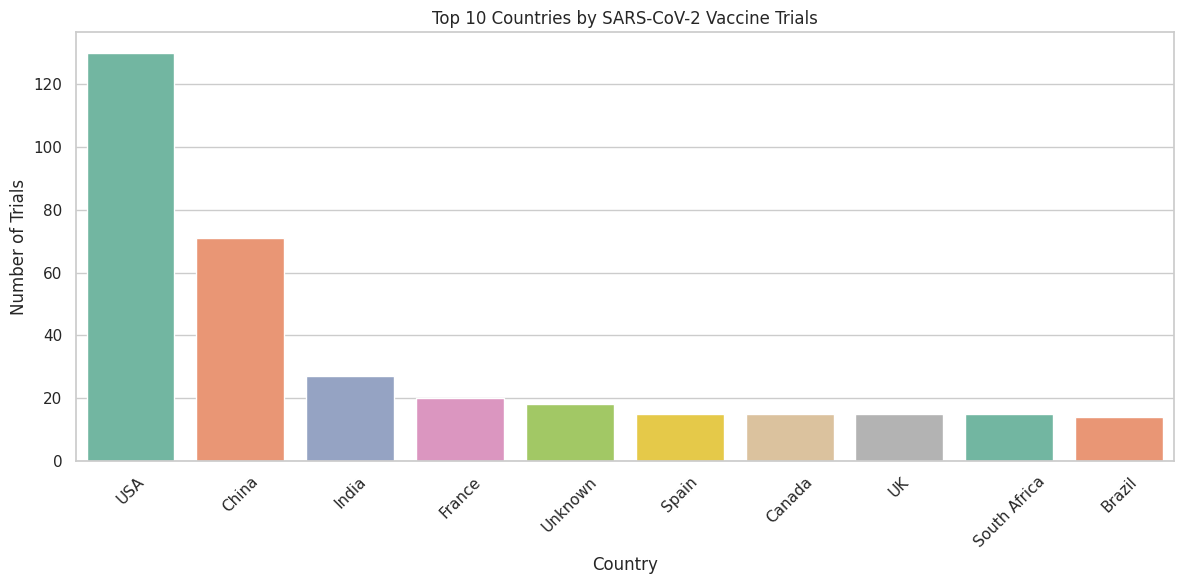

<Figure size 1400x600 with 0 Axes>

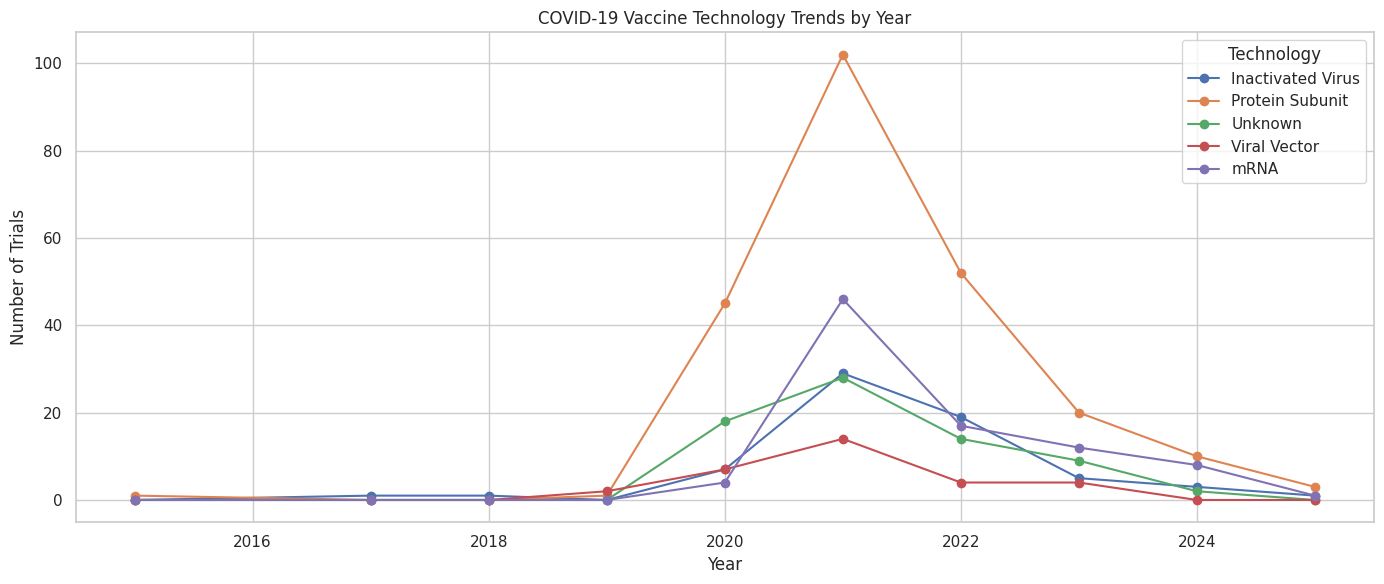

In [ ]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data():
    try:
        # Load data
        country_counts = pd.read_csv("/content/country_counts.csv")
        tech_trends = pd.read_csv("/content/tech_trends.csv")
        print("Loaded analysis results\n")


        # Rename columns for consistency
        country_counts.columns = ["Country", "Trials"]

        # -------- PLOT 1: Top 10 Countries by Vaccine Trials --------
        plt.figure(figsize=(12, 6))
        # Sort by Trials descending for better visuals
        country_counts_sorted = country_counts.sort_values(by="Trials", ascending=False)
        sns.barplot(data=country_counts_sorted, x="Country", y="Trials", palette="Set2")
        plt.title("Top 10 Countries by SARS-CoV-2 Vaccine Trials")
        plt.xlabel("Country")
        plt.ylabel("Number of Trials")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # -------- PLOT 2: Vaccine Technology Trends Over Years --------
        melted = tech_trends.melt(id_vars=["Year"], var_name="Technology", value_name="Trials")
        pivot_table = melted.pivot_table(index='Year', columns='Technology', values='Trials', aggfunc='sum', fill_value=0)

        plt.figure(figsize=(14, 6))
        pivot_table.plot(marker='o', figsize=(14, 6))
        plt.title("COVID-19 Vaccine Technology Trends by Year")
        plt.xlabel("Year")
        plt.ylabel("Number of Trials")
        plt.grid(True)
        plt.legend(title="Technology")
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print("Error: One or more CSV files not found.")

# Run the visualization
visualize_data()
